# Traffic Sign Classification - LeNet Deep Network

### by ReDay Zarra

This project utilizes the LeNet deep network architecture to classify 42 different types of traffic signs. LeNet refers to a convolutional neural network that can be used for computer vision and classification models. This project showcases a step-by-step implementation of the model as well as in-depth notes to customize the model further for higher accuracy.

## Importing the necessary libraries

In [36]:
import pandas as pd
import numpy as np

> Classic libraries that will help us read and analyze data

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

> Libraries used for plotting and data visualization

In [38]:
import pickle

> Using pickle package to open our data, not much use after that

## Importing the dataset

Importing the data into three different sections: training, validation, and
testing. Training data is used to train the network, testing data is used to test
the trained network with data that it has never seen to see how it would perform in
the real world. The validation dataset ensures that we avoid overfitting by showing
the network validation data every epoch (or run) in a process called 
cross-validation to ensure that the network is not focusing on the details of the
training data. 

In [39]:
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)

In [40]:
with open("./traffic-signs-data/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)

In [41]:
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

### Splitting the dataset into training and testing sets

Splitting the data into our individual training, validation, and testing set variables.

In [42]:
X_train, y_train = train['features'], train['labels']

> Assigning the features of the training set as X_train and the dependent variable (labels) as y_train

In [43]:
X_validation, y_validation = valid['features'], valid['labels']

> Assigning the features of the validation set as X_validation and the dependent variable (labels) as y_validation

In [44]:
X_test, y_test = test['features'], test['labels']

> Assigning the features of the testing set as X_test and the dependent variable (labels) as y_test

### Checking the dimensions of the datasets

In [45]:
X_train.shape

(34799, 32, 32, 3)

> Gives us an output of a four element tuple. The first number is the quantity of images, the second is the width of image in pixels, the third is the height of the image, and the last number the depth - in this case the 3 tells us that the images are colored since they are being multiplied for both Red, Green, and Blue

In [46]:
y_train.shape

(34799,)

> Gives us a tuple of one element, which is a label for each image in the training set

In [47]:
X_validation.shape

(4410, 32, 32, 3)

> A smaller subset only containing 4410 pictures, which are 32 x 32, and have a depth of 3 meaning they are colored with RGB

In [48]:
X_test.shape

(12630, 32, 32, 3)

In [49]:
y_test.shape

(12630,)

## Verifying the images from the dataset

Using matplotlib to display a randomly choosen image and see if it matches with its label, just to see what the images are and how the network will be classifying them. Each type of sign has its own class which will identify the type of sign to the model. 

In [54]:
i = 23 

> The index of the image we want to look at, arbitrarily chose 23

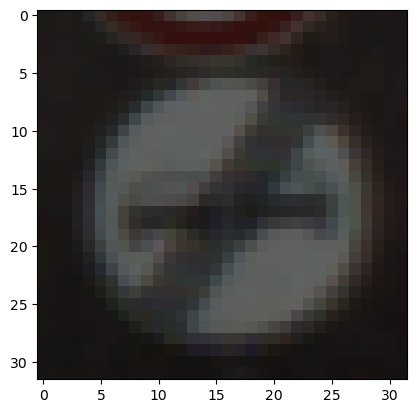

In [55]:
plt.imshow(X_train[i])

> Using matplotlib's .imshow method to show an image from the features training set at the index of 23

In [56]:
y_train[i]

41

 >Also show us the corresponding label from the same index in the label's training set - the label tells us that the sign is a "End of No Passing"

41

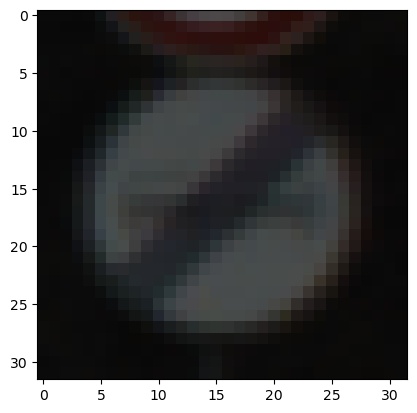

In [58]:
plt.imshow(X_validation[i])
y_validation[i]

>Verifying images for the validation dataset

3

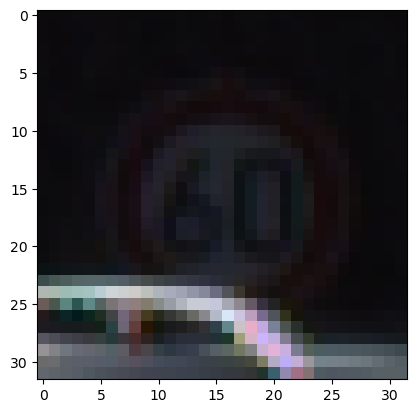

In [60]:
plt.imshow(X_test[i])
y_test[i]

> Verifying images for the testing dataset

## Preparing the data 

Preparing the data by shaving off things we don't need in the data. Such as 
transforming the images from RBG to grayscale (changes the depth from 3 to 1). I 
will also perform data normalization, where instead of using the pixel values 
ranging from 0 to 255, we can lower the range to use a more restricted range of
pixel values. The data needs to also be shuffled so the images do not get trained
in a certain order, we do not want the network to learn the order of these images.
We want to make it as hard as possible for the network to learn, which is why we
use low-quality images, more restricted pixel range, and grayscale images. 

### Shuffling the dataset

In [61]:
from sklearn.utils import shuffle

> Importing the shuffle module from the sci-kit learn library to shuffle the dataset first

In [62]:
X_train, y_train = shuffle(X_train, y_train)

> Used the shuffle function to reassign the variables of X_train and y_train into a different order, however the labels still correspond to the correct images because the shuffle function reorders them the same way

### Transforming the data from RBG to Grayscale

In [63]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)

> Use numpy to average the pixels to get the grayscale version of the image. We will simply add the pixel values from the three color channels (Red, Green, and Blue) and then divide them by 3. 

In [64]:
X_train_gray.shape

(34799, 32, 32, 1)

> The depth of the features training set is no longer 3, its now 1. This means the images are now grayscale

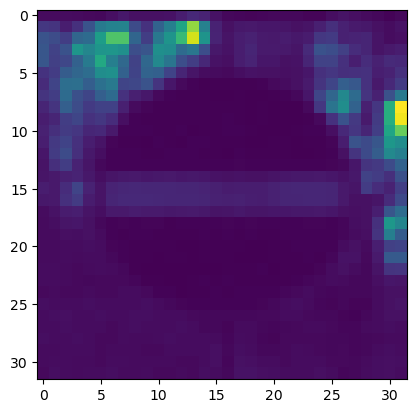

In [66]:
plt.imshow(X_train_gray[i])

> The network will now learn from this "grayscale" image which uses much less processing power because the image depth is reduced to 1

In [67]:
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_validation_gray.shape

(4410, 32, 32, 1)

> Averaging the RGB values to reduce the depth from 3 to 1 for the feature's validation set

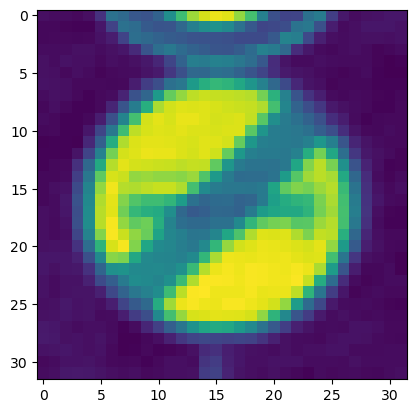

In [68]:
plt.imshow(X_validation_gray[i])

> Grayscale sample image from the feature's validation set

In [69]:
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_test_gray.shape

(12630, 32, 32, 1)

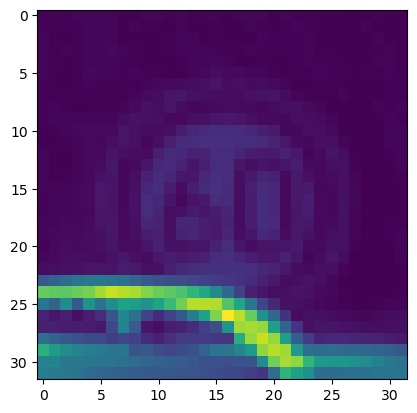

In [70]:
plt.imshow(X_test_gray[i])